In [24]:
#importing libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
%matplotlib inline

In [25]:
#importing files in pandas dataframe
train = pd.read_csv('train.csv',header=0)
trainOrig = train
test = pd.read_csv('test.csv',header = 0)
testOrig = test
labels = train['label']
labelsOrig = labels
train.drop('label',axis=1, inplace =True)
#test shape =(28000,784), train shape =(42000,784), labels shape = (42000,1)

In [26]:
#Converting dataframes into numpy arrays
train = train.as_matrix()
test = test.as_matrix()
labels = labels.as_matrix()

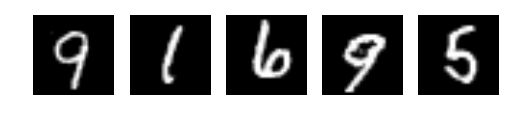

Labels: [9, 1, 6, 9, 5]


In [27]:
#Visualization of few random hand written digits
fig = plt.figure()
randLabels = []
for i in range(1,6):
    k = random.randrange(0,42000,10)
    ax = fig.add_subplot(1,5,i)
    ax.imshow(train[k,:].reshape(28,28),'gray')
    ax.axis('off')
    randLabels.append(labels[k])
plt.show()
print('Labels: {}'.format(randLabels))

In [28]:
#PreProcessing(Data Compression)
pca = PCA()
pca.fit(train)
VarianceRatio = pca.explained_variance_ratio_

In [29]:
#Finding number of principal components
#Retaining 80% of total variance 
TotVar = 0 
for idx, Var in enumerate(VarianceRatio):
    TotVar += Var 
    if(TotVar>=0.80): 
        break 
print('Total Retained Variance: {}'.format(TotVar)) 
print('Number of principal components {}'.format(idx))

Total Retained Variance: 0.8003149736842459
Number of principal components 42


In [30]:
#Again fitting pca for 42 principal components
pcaRed = PCA(n_components = 42,whiten= True)
pcaRed.fit(train)
#Compressing training and testing data using fitted data
train = pcaRed.transform(train)
test = pcaRed.transform(test)

In [31]:
#Grid Search on smaller subset of training data
clf = RandomForestClassifier()
parameter_grid = {
                 'n_estimators' :[200,500,1000,1500,2000],
                 'criterion': ['gini','entropy']
                 }
grid_search = GridSearchCV(clf, param_grid=parameter_grid, cv=3)
grid_search.fit(train, labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9504761904761905
Best parameters: {'n_estimators': 2000, 'criterion': 'gini'}


In [ ]:
#using classifier to predict test images on public leader board
trainOrig = trainOrig.as_matrix()
testOrig = testOrig.as_matrix()
labelsOrig = labelsOrig.as_matrix()
pca = PCA(n_components = 42, whiten = True)
pca.fit(trainOrig)
trainOrig = pcaRed.transform(trainOrig)
testOrig = pcaRed.transform(testOrig)
clf = RandomForestClassifier(n_estimators = 2000, criterion = 'gini')
clf.fit(trainOrig,labelsOrig)
pred = clf.predict(testOrig)
dfPred = pd.read_csv('sample_submission.csv',header=0)
dfPred['Label']= pd.DataFrame(pred)
dfPred.to_csv('mySubmission.csv', index=False)
#98.229% LeaderBoard Accuracy